In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("FM 2023.csv")

In [3]:
df.shape

(8452, 98)

In [4]:
df.drop("UID", inplace=True, axis=1)

In [5]:
df.rename(columns={"ca": "Current ability",
                   "pa": "Potential ability"}, inplace=True)

In [6]:
df.head(2)

,Name,Position,Age,Current ability,Potential ability,Nationality,Club,Corners,Crossing,Dribbling,...,Domestic reputation,World reputation,Race,RCA,Colour of skin,Date of birth,Number of national team appearances,Goals scored for the national team,Salary,Rental club
0,Kevin De Bruyne,M/AM RLC,31,189,189,Belgium,Manchester City,14,19,15,...,9400,9400,Northern_European,181,4,1991/6/28,91,24,394372.0,NaN
1,Kylian Mbappé,AM/S RL,23,188,197,France,Paris Saint-Germain,13,13,18,...,9398,9248,African_Caribbean,172,13,1998/12/20,57,27,1035616.0,NaN


In [7]:
df.columns

Index(['Name', 'Position', 'Age', 'Current ability', 'Potential ability',
       'Nationality', 'Club', 'Corners', 'Crossing', 'Dribbling', 'Finishing',
       'First Touch', 'Free Kick Taking', 'Heading', 'Long Shots',
       'Long Throws', 'Marking', 'Passing', 'Penalty Taking', 'Tackling',
       'Technique', 'Aggressiion', 'Anticipation', 'Bravery', 'Composure',
       'Concentration', 'Vision', 'Decision', 'Determination', 'Flair',
       'Leadership', 'Off The Ball', 'Position.1', 'Teamwork', 'Work Rate',
       'Acceleration', 'Agility', 'Balance', 'Jumping Reach',
       'Natural Fitness', 'Pace', 'Stamina', 'Strength', 'Stability', 'Foul',
       'Contest performance', 'Injury', 'diversity', 'Aerial Reach',
       'Command Of Area', 'Communication', 'Eccentricity', 'Handling',
       'Kicking', 'One On Ones', 'Reflexes', 'Rushing Out', 'Punching',
       'Throwing', 'Adaptation', 'Ambition', 'Argue', 'Loyal',
       'Resistant to stress', 'Professional', 'Sportsmanship',
     

In [8]:
u21 = df[df["Age"]<=21] # there are 2599 players

In [9]:
topPlayers = df[df["Current ability"]>=170] # there are 25 players.

In [10]:
topPotential = df[df["Potential ability"]>=170] # there are 136 players

In [11]:
futureStars = df[(df["Potential ability"]>=160) & (df["Age"]<=23)] # there are 112 players.

In [12]:
fener = df[df["Club"]=="Fenerbahçe A.Ş."] # there are 25 players

In [13]:
cornerKickers = df[df["Corners"]>=16] # there are 75 players

In [14]:
penaltyKickers = df[df["Penalty Taking"] >= 17] # there are 97 players

In [15]:
fastestPlayers = df[(df["Pace"] >=17) & (df["Acceleration"]>=17)] # there are 68 players

In [16]:
bestPassers = df[df["Passing"]>=17] # there are 73 players

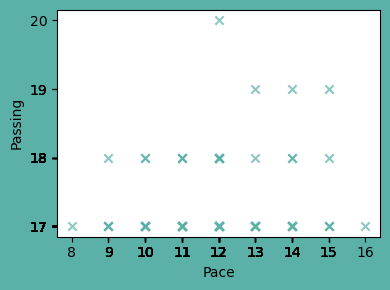

In [39]:
#  pace and passing scatter between best passers

plt.figure(facecolor="#5bb0a8", figsize=(4,3))
plt.scatter(bestPassers["Pace"],bestPassers["Passing"], marker="x", alpha=0.7, color= "#5bb0a8")
plt.yticks(bestPassers["Passing"])
plt.xticks(bestPassers["Pace"])
plt.ylabel("Passing")
plt.xlabel("Pace")


plt.tight_layout()
plt.show()

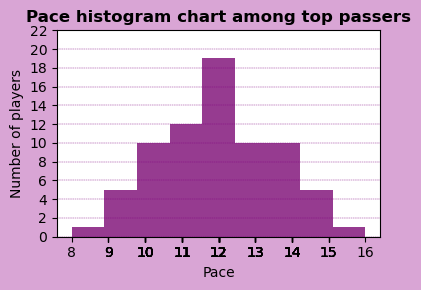

In [84]:
# pace histogram chart among top passers

plt.figure(facecolor="#d9a5d5", figsize=(4,3))
plt.title("Pace histogram chart among top passers",
          fontdict={'color':  'black',
                    'weight': 'bold',
                    'size': 12})
plt.hist(bestPassers["Pace"], 9, color="#963b90")
plt.xticks(bestPassers["Pace"])
plt.yticks(range(0,len(bestPassers)//3,2))
plt.xlabel("Pace")
plt.ylabel("Number of players")
plt.grid(color = 'purple', linestyle = '--', linewidth = 0.3, axis="y")

plt.tight_layout()
plt.show()

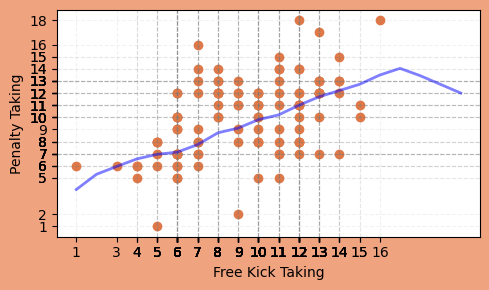

In [72]:
# relation between penalty taking and freekick taking among future stars

plt.figure(figsize=(5,3), facecolor="#f0a37f")
plt.scatter(futureStars["Free Kick Taking"], futureStars["Penalty Taking"], color="#e07848")
plt.yticks(futureStars["Penalty Taking"][::2])
plt.xticks(futureStars["Free Kick Taking"])
plt.ylabel("Penalty Taking")
plt.xlabel("Free Kick Taking")
plt.grid(color="grey", linewidth=0.8, linestyle="--", alpha=0.1)

# mean value added
mean = df.groupby("Free Kick Taking")["Penalty Taking"].mean()
plt.plot(mean.index, mean.values, color="b", linewidth=2, alpha=0.5)


plt.tight_layout()
plt.show()

In [20]:
values = df["Values"]//100000  # 

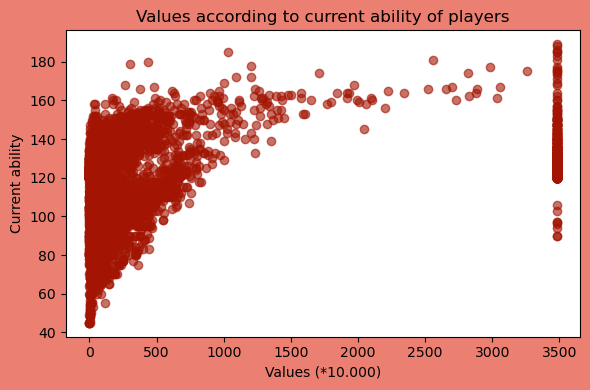

In [29]:
plt.figure(figsize=(6,4), facecolor="#eb7f71")
plt.title("Values according to current ability of players")
plt.scatter(values, df["Current ability"], color="#a31402", alpha=0.6)

plt.ylabel("Current ability")
plt.xlabel("Values (*10.000)")


plt.tight_layout()
plt.show()

In [22]:
mostValuable = df[df["Values"]>340000000] # there are 533 players

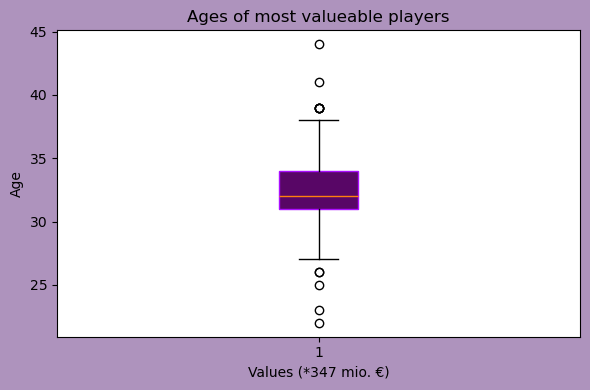

In [36]:
plt.figure(figsize=(6,4), facecolor="#ae93bd")
plt.title("Ages of most valueable players")
plt.boxplot(mostValuable["Age"], patch_artist=True, boxprops=dict(facecolor="#580666", color="#ab0fff"))

plt.ylabel("Age")
plt.xlabel("Values (*347 mio. €)")


plt.tight_layout()
plt.show()

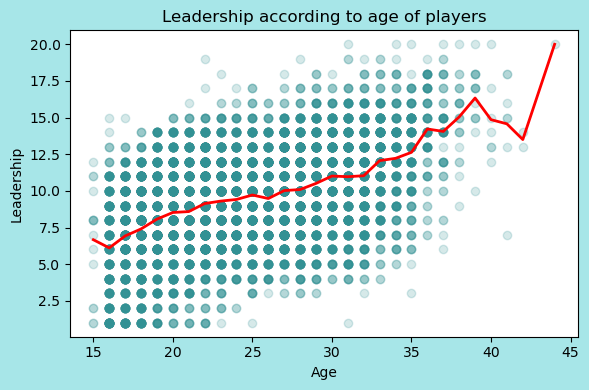

In [35]:
plt.figure(figsize=(6,4), facecolor="#a7e6e8")
plt.scatter(df["Age"], df["Leadership"], color="#329194", alpha=0.2), df["Leadership"]
plt.title("Leadership according to age of players")

plt.ylabel("Leadership")
plt.xlabel("Age")

# mean value added
mean_leadership = df.groupby('Age')['Leadership'].mean()
plt.plot(mean_leadership.index, mean_leadership.values, color="red", linewidth=2)

plt.tight_layout()
plt.show()

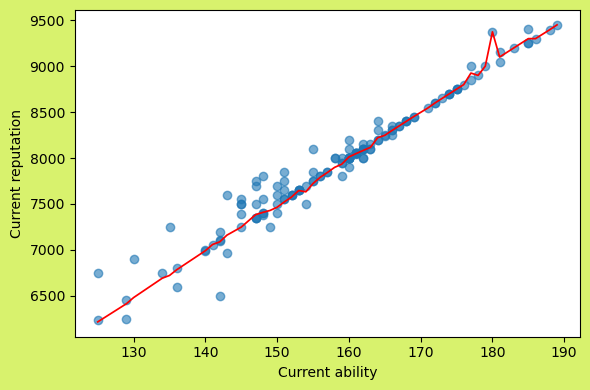

In [70]:
# Relationship between reputation and current ability among top potential players

plt.figure(figsize=(6,4), facecolor = "#d8f26d")
plt.scatter(topPotential["Current ability"], topPotential["Current reputation"], alpha=0.6)
plt.xlabel("Current ability")
plt.ylabel("Current reputation")
plt.xticks()

# mean value added
mean = df.groupby("Current ability")["Current reputation"].mean()
mean = mean.loc[topPotential["Current ability"].unique()]   
plt.plot(mean.index, mean.values, color = "red", linewidth=1.25)

plt.tight_layout()
plt.show()